In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [92]:
data_test = pd.read_csv('SalaryData_Test.csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [93]:
data_train = pd.read_csv('SalaryData_Train.csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
data_test.shape , data_train.shape

((15060, 14), (30161, 14))

In [95]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [96]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [97]:
data_train = data_train.dropna()

In [98]:
data_train.shape

(30161, 14)

In [99]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [100]:
print('workclass',data_train['workclass'].unique())
print('education',data_train['education'].unique())
print('maritalstatus',data_train['maritalstatus'].unique())
print('occupation',data_train['occupation'].unique())
print('relationship',data_train['relationship'].unique())
print('race',data_train['race'].unique())
print('sex',data_train['sex'].unique())
print('native',data_train['native'].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [101]:
data_train.education.replace(to_replace=' 11th',value='school',inplace= True)
data_train.education.replace(to_replace=' 9th',value='school',inplace=True)
data_train.education.replace(to_replace=' 7th-8th',value='school',inplace=True)
data_train.education.replace(to_replace=' 5th-6th',value='school',inplace=True)
data_train.education.replace(to_replace=' 10th',value='school',inplace=True)
data_train.education.replace(to_replace=' Preschool',value='school',inplace=True)
data_train.education.replace(to_replace=' 12th',value='school',inplace=True)
data_train.education.replace(to_replace=' 1st-4th',value='school',inplace=True)
data_train.education.replace(to_replace=' Some-college',value='college',inplace=True)
data_train.education.replace(to_replace=' Assoc-acdm',value='college',inplace=True)
data_train.education.replace(to_replace=' Assoc-voc',value='college',inplace=True)

In [102]:
data_test.education.replace(to_replace=' 11th',value='school',inplace= True)
data_test.education.replace(to_replace=' 9th',value='school',inplace=True)
data_test.education.replace(to_replace=' 7th-8th',value='school',inplace=True)
data_test.education.replace(to_replace=' 5th-6th',value='school',inplace=True)
data_test.education.replace(to_replace=' 10th',value='school',inplace=True)
data_test.education.replace(to_replace=' Preschool',value='school',inplace=True)
data_test.education.replace(to_replace=' 12th',value='school',inplace=True)
data_test.education.replace(to_replace=' 1st-4th',value='school',inplace=True)
data_test.education.replace(to_replace=' Some-college',value='college',inplace=True)
data_test.education.replace(to_replace=' Assoc-acdm',value='college',inplace=True)
data_test.education.replace(to_replace=' Assoc-voc',value='college',inplace=True)

In [103]:
data_train.maritalstatus.replace(' Never-married','Single',inplace=True)
data_train.maritalstatus.replace(' Married-spouse-absent','Single',inplace=True)
data_train.maritalstatus.replace(' Seperated','Single',inplace=True)
data_train.maritalstatus.replace(' Divorced','Single',inplace=True)
data_train.maritalstatus.replace(' Married-civ-spouse','Married',inplace=True)
data_train.maritalstatus.replace(' Married-AF-spouse','Married',inplace=True)
data_train.maritalstatus.replace(' Widowed','Widowed',inplace=True)

In [104]:
data_test.maritalstatus.replace(' Never-married','Single',inplace=True)
data_test.maritalstatus.replace(' Married-spouse-absent','Single',inplace=True)
data_test.maritalstatus.replace(' Seperated','Single',inplace=True)
data_test.maritalstatus.replace(' Divorced','Single',inplace=True)
data_test.maritalstatus.replace(' Married-civ-spouse','Married',inplace=True)
data_test.maritalstatus.replace(' Married-AF-spouse','Married',inplace=True)
data_test.maritalstatus.replace(' Widowed','Widowed',inplace=True)

In [105]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,school,7,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,college,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,school,6,Single,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [107]:
data_train[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

,education,educationno
1,Doctorate,16.000000
4,Prof-school,15.000000
3,Masters,14.000000
0,Bachelors,13.000000
5,college,10.369551
2,HS-grad,9.000000
6,school,5.609730


In [108]:
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_relation = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_native = LabelEncoder()
le_salary = LabelEncoder()

In [109]:
data_train['workclass'] = le_workclass.fit_transform(data_train['workclass'])
data_train['education'] = le_education.fit_transform(data_train['education'])
data_train['maritalstatus'] = le_marital.fit_transform(data_train['maritalstatus'])
data_train['occupation'] = le_occupation.fit_transform(data_train['occupation'])
data_train['relationship'] = le_relation.fit_transform(data_train['relationship'])
data_train['race'] = le_race.fit_transform(data_train['race'])
data_train['sex'] = le_sex.fit_transform(data_train['sex'])
data_train['native'] = le_native.fit_transform(data_train['native'])
data_train['Salary'] = le_salary.fit_transform(data_train['Salary'])

In [110]:
data_test['workclass'] = le_workclass.fit_transform(data_test['workclass'])
data_test['education'] = le_education.fit_transform(data_test['education'])
data_test['maritalstatus'] = le_marital.fit_transform(data_test['maritalstatus'])
data_test['occupation'] = le_occupation.fit_transform(data_test['occupation'])
data_test['relationship'] = le_relation.fit_transform(data_test['relationship'])
data_test['race'] = le_race.fit_transform(data_test['race'])
data_test['sex'] = le_sex.fit_transform(data_test['sex'])
data_test['native'] = le_native.fit_transform(data_test['native'])
data_test['Salary'] = le_salary.fit_transform(data_test['Salary'])

In [111]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,0,13,2,0,1,4,1,2174,0,40,37,0
1,50,4,0,13,1,3,0,4,1,0,0,13,37,0
2,38,2,2,9,2,5,1,4,1,0,0,40,37,0
3,53,2,6,7,1,5,0,2,1,0,0,40,37,0
4,28,2,0,13,1,9,5,2,0,0,0,40,4,0


In [112]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,6,7,2,6,3,2,1,0,0,40,37,0
1,38,2,2,9,1,4,0,4,1,0,0,50,37,0
2,28,1,5,12,1,10,0,4,1,0,0,40,37,1
3,44,2,5,10,1,6,0,2,1,7688,0,40,37,1
4,34,2,6,6,2,7,1,4,1,0,0,30,37,0


In [113]:
data_train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.056522,0.043525,-0.194139,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,-0.010437,0.037833,-0.062628,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.056522,-0.010437,1.000000,-0.511077,0.050580,-0.030796,0.083442,-0.020990,-0.035261,-0.044380,-0.039169,-0.126504,-0.049313,-0.172481
educationno,0.043525,0.037833,-0.511077,1.000000,-0.053513,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.194139,-0.062628,0.050580,-0.053513,1.000000,-0.021032,0.377032,-0.040984,-0.345418,-0.065202,-0.061239,-0.198545,0.013237,-0.340807
occupation,-0.005682,0.015572,-0.030796,0.087717,-0.021032,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,0.083442,-0.091935,0.377032,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,-0.020990,0.032805,-0.040984,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.035261,0.006155,-0.345418,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,-0.044380,0.124416,-0.065202,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


By Correlation we found that workclass,race,native have less impact on salary
So we remove these columns

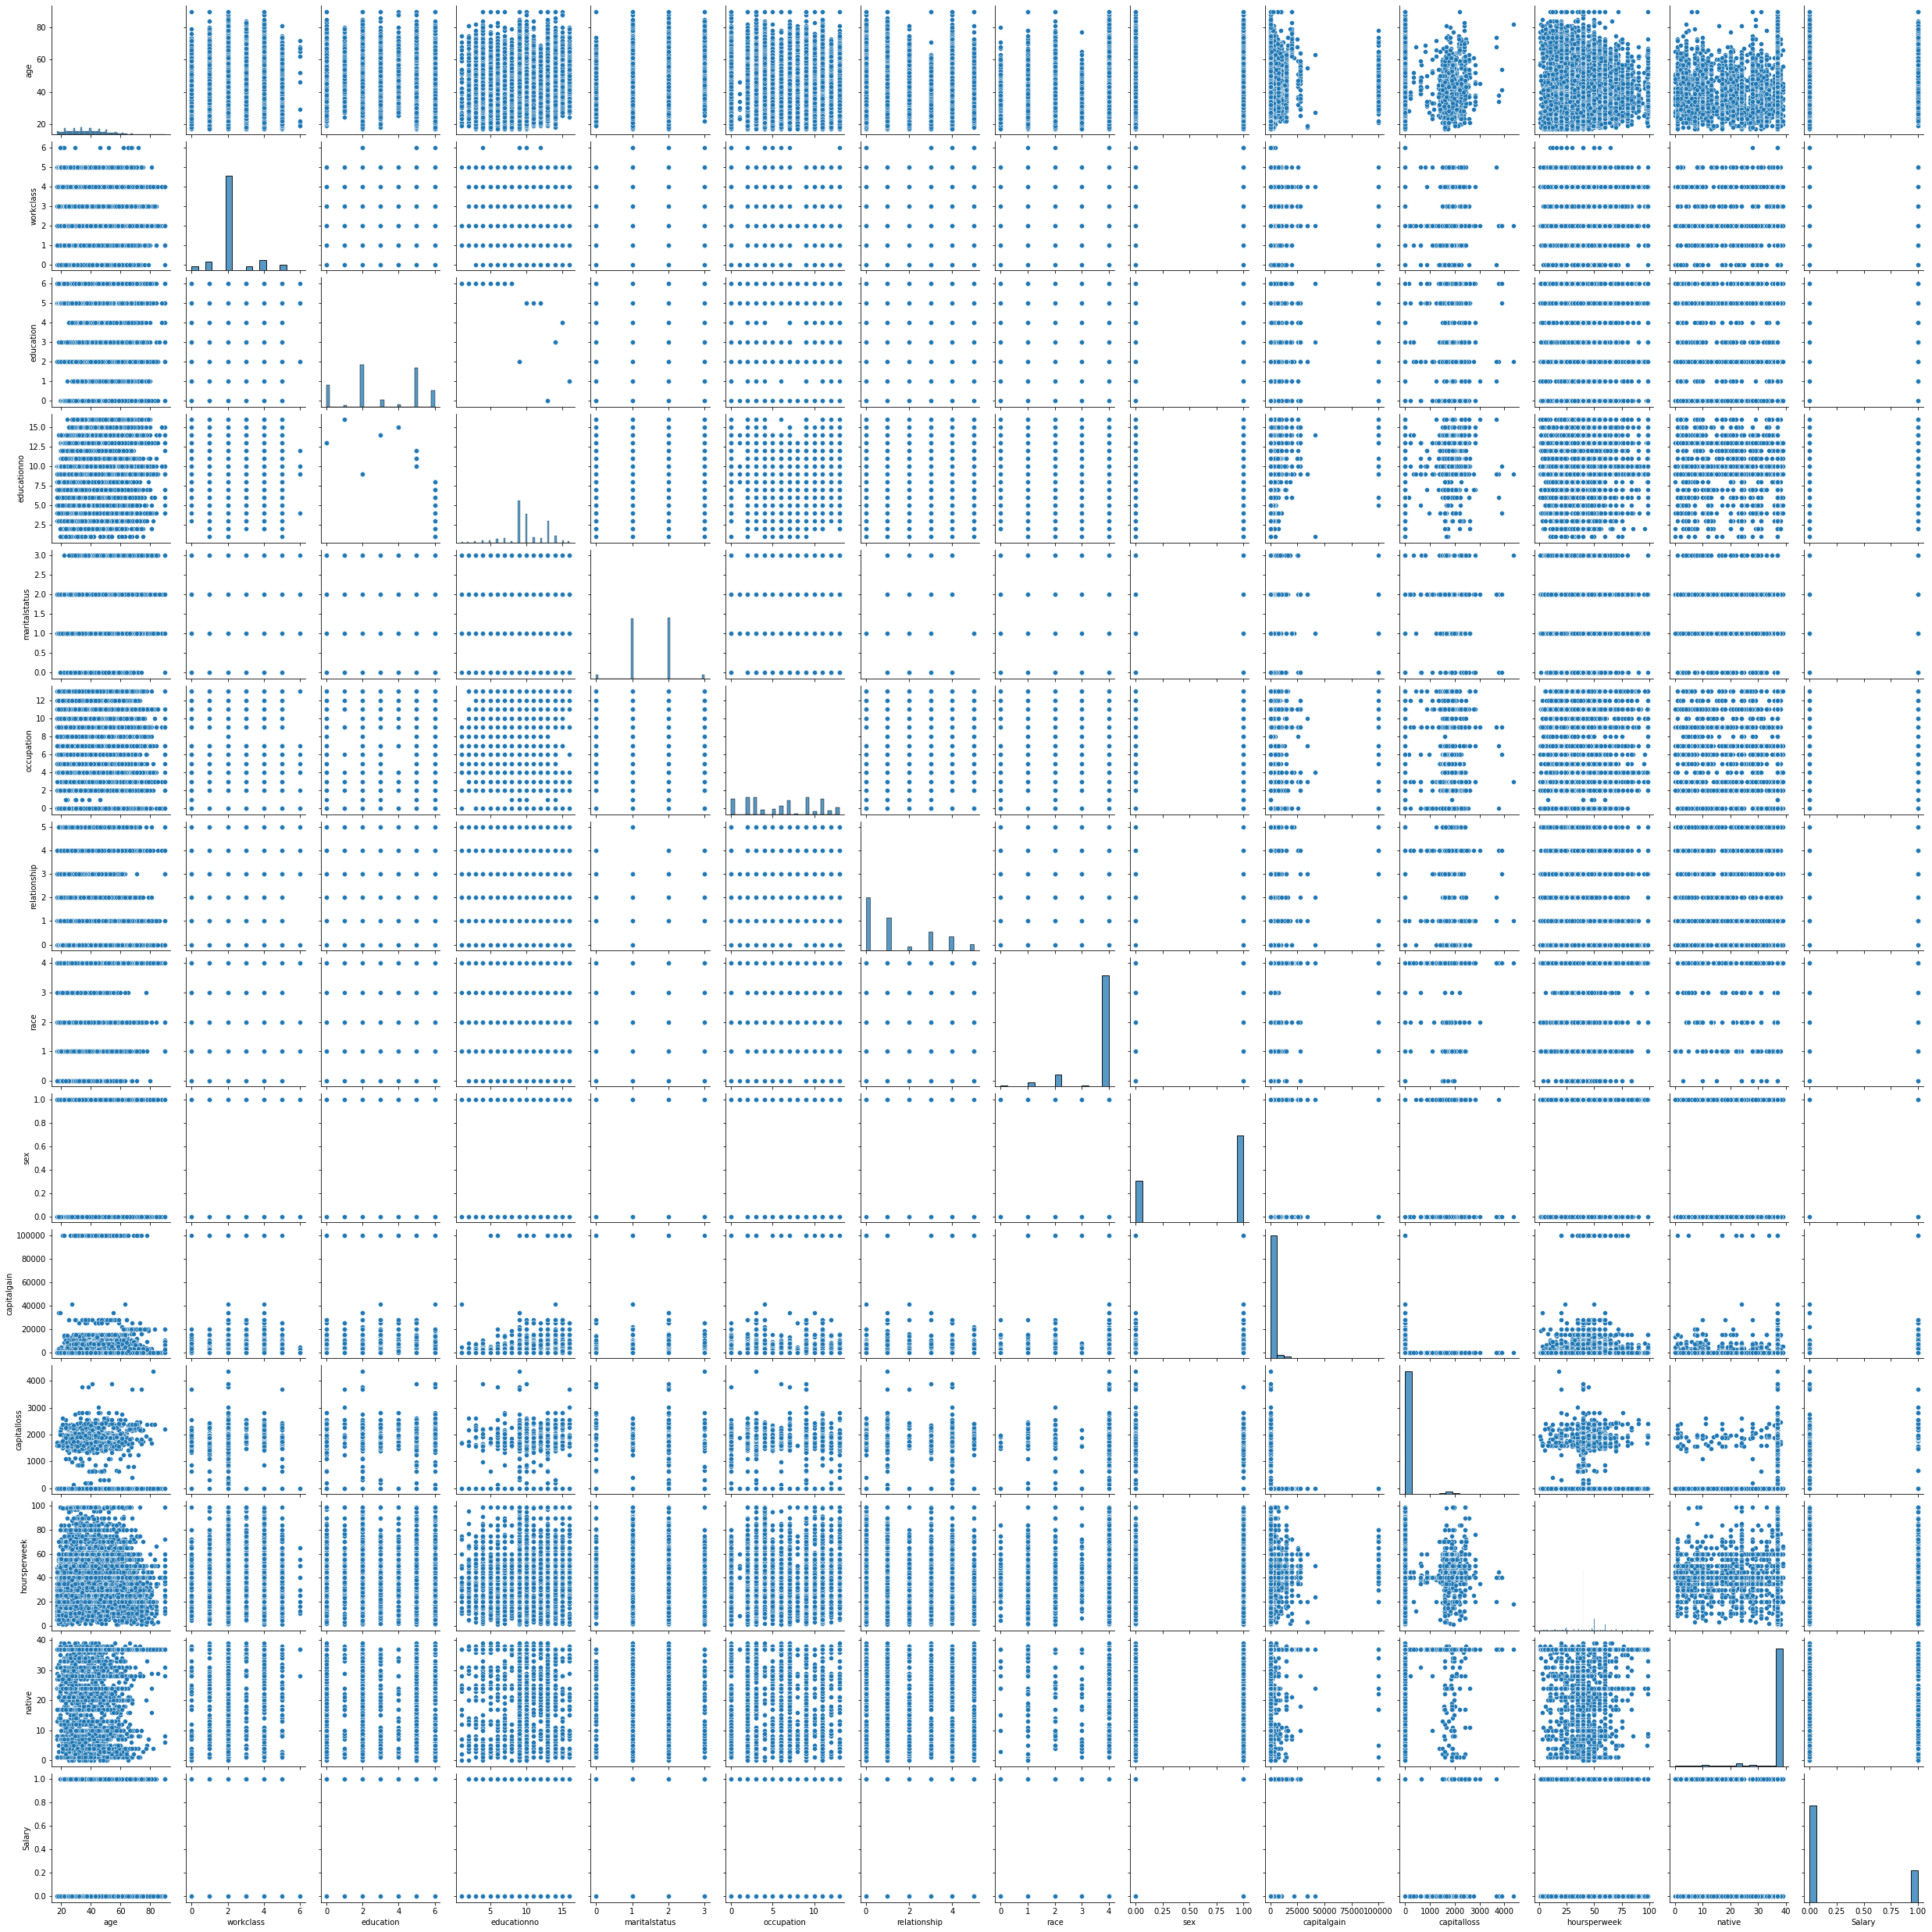

In [42]:
sns.pairplot(data_train)

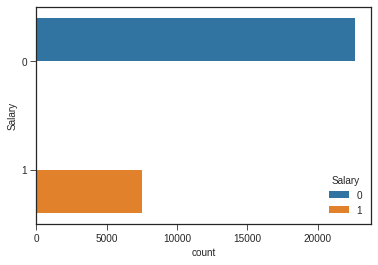

In [114]:
sns.countplot(y=data_train['Salary'],hue=data_train['Salary'])

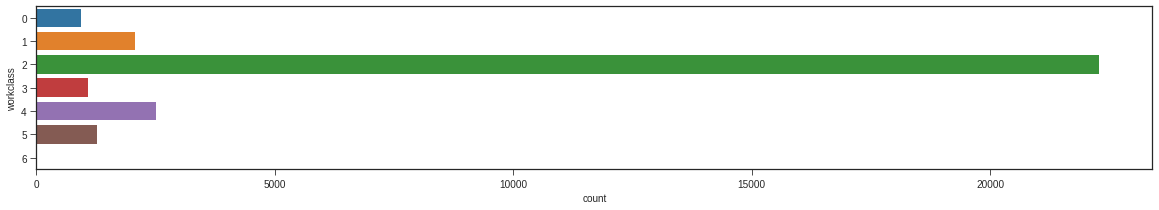

In [115]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=data_train)

In [116]:
X = data_train.iloc[:,[0,2,3,4,5,6,8,9,10,11]]
X.head()

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek
0,39,0,13,2,0,1,1,2174,0,40
1,50,0,13,1,3,0,1,0,0,13
2,38,2,9,2,5,1,1,0,0,40
3,53,6,7,1,5,0,1,0,0,40
4,28,0,13,1,9,5,0,0,0,40


In [117]:
Y = data_train.iloc[:,13]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

In [118]:
X_test = data_test.iloc[:,[0,2,3,4,5,6,8,9,10,11]]
Y_test = data_test.iloc[:,13]

In [119]:
naive = GaussianNB()

In [120]:
naive.fit(X,Y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
pred = naive.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
print(cm)


[[10771   589]
 [ 2543  1157]]


In [123]:
accuracy = naive.score(X_test,Y_test)

In [124]:
print('The accuracy is =',accuracy)

The accuracy is = 0.7920318725099602
